In [1]:
#Practica 6 applicacion de red LSTM para prediccion de Precio de Petroleo

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from keras.layers import LSTM
from __future__ import print_function
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Dense, Activation

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import math, time
from sklearn.metrics import mean_squared_error

In [4]:
#LEER TABLA DE DATOS
SALES = pd.read_csv('PrecioPetroleoDEF.csv', sep=";")
SALES.head()

,Fecha,Mezcla_Mexicana
0,03/01/2005,31.42
1,04/01/2005,32.77
2,05/01/2005,32.64
3,06/01/2005,33.95
4,07/01/2005,34.15


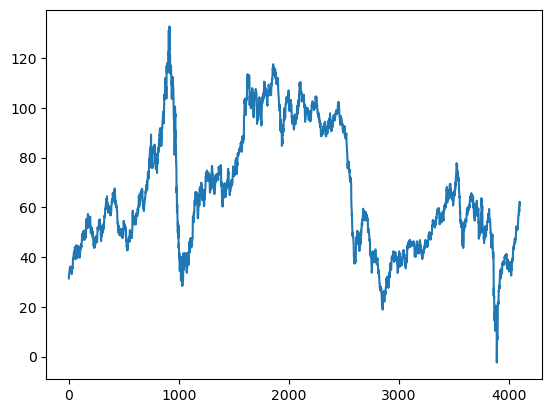

In [5]:
plt.plot(SALES['Mezcla_Mexicana'])
plt.show()

In [8]:
SALES

,Fecha,Mezcla_Mexicana
0,03/01/2005,31.42
1,04/01/2005,32.77
2,05/01/2005,32.64
3,06/01/2005,33.95
4,07/01/2005,34.15
...,...,...
4092,22/02/2021,60.10
4093,23/02/2021,60.53
4094,24/02/2021,61.85
4095,25/02/2021,62.23


In [7]:
#SALESM=SALES['Mezcla_Mexicana'].to_numpy()
#SALESM.shape

In [19]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
SALESM = min_max_scaler.fit_transform(SALES['Mezcla_Mexicana'].values.reshape(-1, 1))

In [20]:
SALESM

array([[0.25014806],
       [0.26014214],
       [0.25917975],
       ...,
       [0.47542197],
       [0.47823512],
       [0.46831507]])

In [25]:
#SALESM = np.reshape(SALESM, (len(SALES), 1))
SALESM.shape

(4097, 1)

In [22]:
SALESM[0:10]

array([[0.25014806],
       [0.26014214],
       [0.25917975],
       [0.2688777 ],
       [0.27035831],
       [0.27183891],
       [0.27368967],
       [0.27480012],
       [0.28175896],
       [0.28397986]])

In [26]:
#Separar conjunto de prueba y entrenamiento
train_size = int(len(SALESM) * 0.7)
print(train_size)
test_size = len(SALESM) - train_size
print(test_size)
train, test = SALESM[0:train_size,:], SALESM[train_s
                                             ize:len(SALESM),:]
print(len(train), len(test))

2867
1230
2867 1230


In [27]:
print(len(SALESM))
print(122 + 53)

4097
175


In [29]:
# convert an array of values into a SALESM matrix
def create_matrix(SALESM, look_back=15):
    dataX, dataY = [], []
    for i in range(len(SALESM)-look_back-1):
        a = SALESM[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(SALESM[i + look_back,0])
    return np.array(dataX), np.array(dataY)

In [30]:
x_train, y_train = create_matrix(train, look_back=15)
x_test, y_test = create_matrix(test, look_back=15)

In [31]:
display(y_train)

array([0.28220314, 0.28560853, 0.28597868, ..., 0.20062185, 0.19403317,
       0.18663015])

In [33]:
len(y_train)

2851

In [39]:
len(x_train)

2851

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2851, 15)
(2851,)
(1214, 15)
(1214,)


In [43]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [44]:
x_train

array([[[0.25014806, 0.26014214, 0.25917975, ..., 0.27383773,
         0.26984009, 0.2791679 ]],

       [[0.26014214, 0.25917975, 0.2688777 , ..., 0.26984009,
         0.2791679 , 0.28220314]],

       [[0.25917975, 0.2688777 , 0.27035831, ..., 0.2791679 ,
         0.28220314, 0.28560853]],

       ...,

       [[0.17078768, 0.16575363, 0.15746224, ..., 0.21113414,
         0.21254072, 0.20802487]],

       [[0.16575363, 0.15746224, 0.16797453, ..., 0.21254072,
         0.20802487, 0.20062185]],

       [[0.15746224, 0.16797453, 0.18611193, ..., 0.20802487,
         0.20062185, 0.19403317]]])

In [45]:
y_train

array([0.28220314, 0.28560853, 0.28597868, ..., 0.20062185, 0.19403317,
       0.18663015])

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2851, 1, 15)
(2851,)
(1214, 1, 15)
(1214,)


In [47]:
# create and fit the LSTM network
look_back = 15
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mape', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
2851/2851 - 4s - loss: 4.7855 - 4s/epoch - 1ms/step
Epoch 2/20
2851/2851 - 3s - loss: 2.9396 - 3s/epoch - 996us/step
Epoch 3/20
2851/2851 - 3s - loss: 2.9045 - 3s/epoch - 948us/step
Epoch 4/20
2851/2851 - 3s - loss: 2.6503 - 3s/epoch - 952us/step
Epoch 5/20
2851/2851 - 3s - loss: 2.5556 - 3s/epoch - 964us/step
Epoch 6/20
2851/2851 - 3s - loss: 2.4862 - 3s/epoch - 990us/step
Epoch 7/20
2851/2851 - 3s - loss: 2.4570 - 3s/epoch - 970us/step
Epoch 8/20
2851/2851 - 3s - loss: 2.3058 - 3s/epoch - 1ms/step
Epoch 9/20
2851/2851 - 3s - loss: 2.3238 - 3s/epoch - 1ms/step
Epoch 10/20
2851/2851 - 3s - loss: 2.2678 - 3s/epoch - 1ms/step
Epoch 11/20
2851/2851 - 3s - loss: 2.2211 - 3s/epoch - 1ms/step
Epoch 12/20
2851/2851 - 3s - loss: 2.2382 - 3s/epoch - 962us/step
Epoch 13/20
2851/2851 - 3s - loss: 2.2042 - 3s/epoch - 973us/step
Epoch 14/20
2851/2851 - 3s - loss: 2.1558 - 3s/epoch - 1ms/step
Epoch 15/20
2851/2851 - 3s - loss: 2.1343 - 3s/epoch - 971us/step
Epoch 16/20
2851/2851 - 3s - lo

In [21]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

38/38 [==============================] - 0s 724us/step


In [58]:
trainPredict

array([[77.433586],
       [77.433586],
       [77.433586],
       ...,
       [77.433586],
       [77.433586],
       [77.433586]], dtype=float32)

In [22]:
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])

In [23]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(SALESM)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict

In [24]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(SALESM)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(SALESM)-1, :] = testPredict

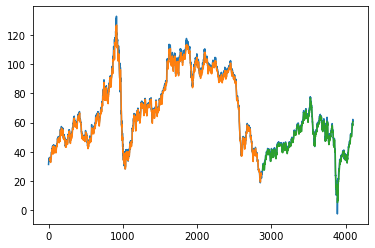

In [25]:
# plot baseline and predictions
plt.plot(min_max_scaler.inverse_transform(SALESM))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [66]:
trainPredictPlot

array([[        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [ 9.11157799],
       [ 8.51650238],
       [11.57156181],
       [ 9.11157799],
       [10.68711662],
       [10.68711662],
       [10.68711662],
       [ 9.11157799],
       [ 9.11157799],
       [10.68711662],
       [ 9.11157799],
       [ 9.11157799],
       [ 9.11157799],
       [ 9.11157799],
       [10.68711662],
       [10.68711662],
       [11.57156181],
       [ 8.51650238],
       [ 9.40094757],
       [ 8.51650238],
       [11.57156181],
       [10.68711662],
       [10.97648621],
       [10.09203911],
       [ 9.50557709],
       [10.09203911],
       [11.57156181],
       [ 8.51650238],
       [10.97648621],
       [ 8.51650238],
       [11